<a href="https://colab.research.google.com/github/VijayDayakaran/Deep-Learning-approach-for-ECG-based-prediction-and-diagnosis-of-Heart-Disease/blob/main/Final_cap_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wfdb
import os
import numpy as np
import pandas as pd
import wfdb
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!unzip /content/mitbih_test.csv.zip -d /content/ECG_Dataset

Archive:  /content/mitbih_test.csv.zip
  inflating: /content/ECG_Dataset/mitbih_test.csv  


In [ ]:
ls -lh /content/mitbih_test.csv.zip

-rw-r--r-- 1 root root 17M Mar 22 18:32 /content/mitbih_test.csv.zip


In [ ]:
csv_path = "/content/ECG_Dataset/mitbih_test.csv"
df = pd.read_csv(csv_path, header=None)


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


y = (y > 0).astype(int)


X, y = SMOTE().fit_resample(X, y)
scaler = StandardScaler()
X = scaler.fit_transform(X).reshape(-1, X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


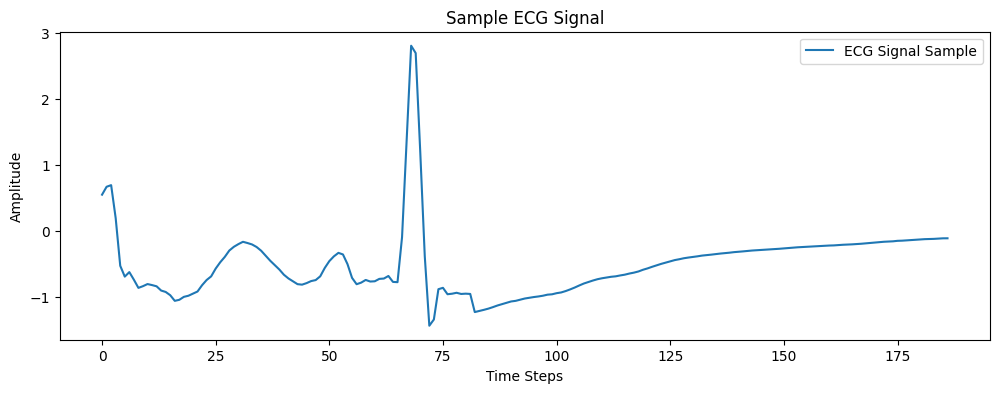

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(X_train[0].reshape(-1), label='ECG Signal Sample')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.title('Sample ECG Signal')
plt.legend()
plt.show()

In [ ]:
input_layer = layers.Input(shape=(X_train.shape[1], 1))
x = layers.Conv1D(32, 5, activation='relu', padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(2)(x)

x = layers.Conv1D(64, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(2)(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128, activation='relu', name="feature_extraction")(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


906/906 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6590 - loss: 0.6168 - val_accuracy: 0.7735 - val_loss: 0.5121
Epoch 2/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7767 - loss: 0.4742 - val_accuracy: 0.8219 - val_loss: 0.4038
Epoch 3/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8376 - loss: 0.3853 - val_accuracy: 0.8842 - val_loss: 0.3198
Epoch 4/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8780 - loss: 0.3130 - val_accuracy: 0.9058 - val_loss: 0.2704
Epoch 5/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8992 - loss: 0.2713 - val_accuracy: 0.9190 - val_loss: 0.2217
Epoch 6/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9070 - loss: 0.2438 - val_accuracy: 0.9270 - val_loss: 0.2005
Epoch 7/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9165 - loss: 0.2221 - val_accuracy: 0.9310 - val_loss: 0.1887
Epoch 8/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9252 - loss: 0.1975 - val_accurac

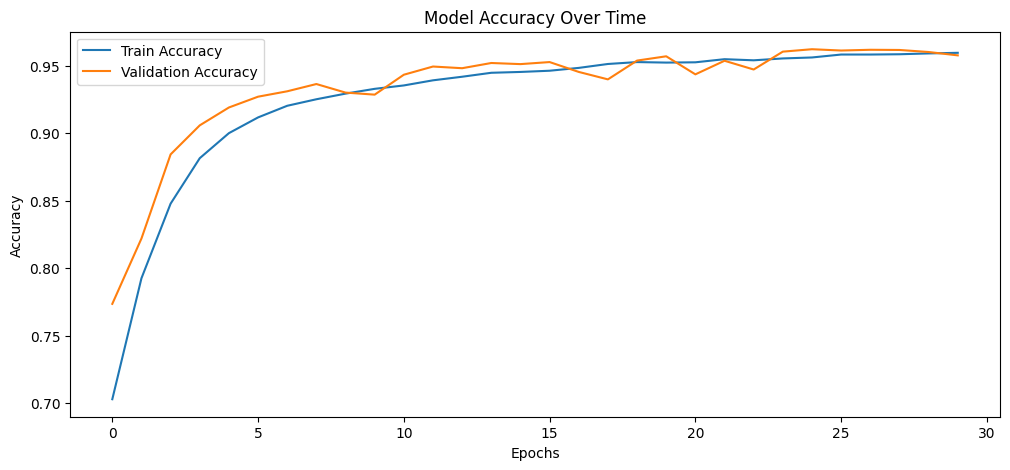

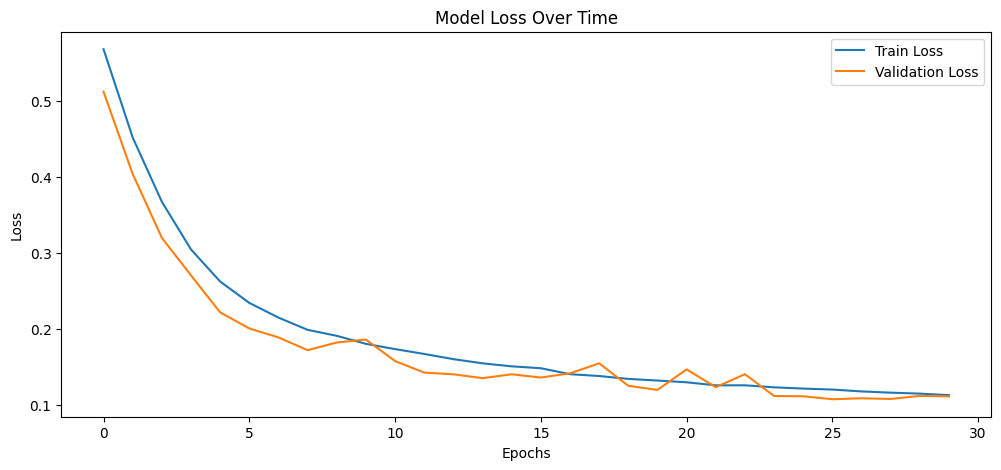

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Time')
plt.legend()
plt.show()

In [ ]:
feature_extractor = models.Model(inputs=model.input, outputs=model.get_layer("feature_extraction").output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)


906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

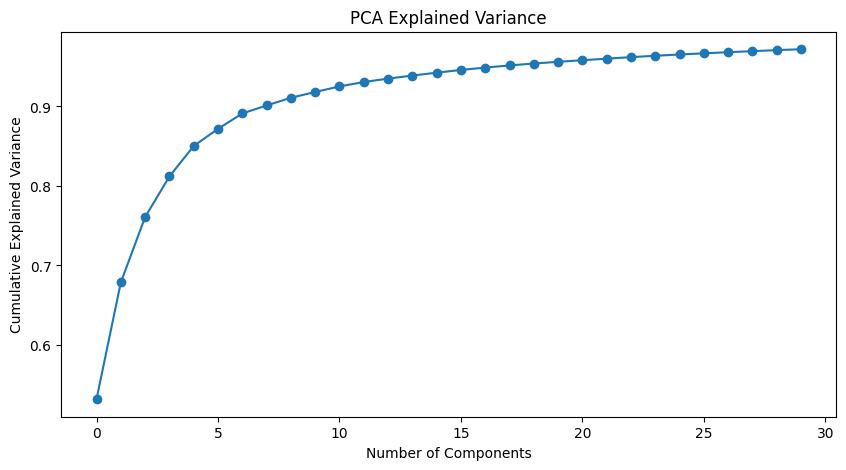

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Final Accuracy: {accuracy * 100:.2f}%')
print(f'Final F1-Score: {f1 * 100:.2f}%')
print(cm)


Final Accuracy: 97.32%
Final F1-Score: 97.34%
[[3503  111]
 [  83 3551]]


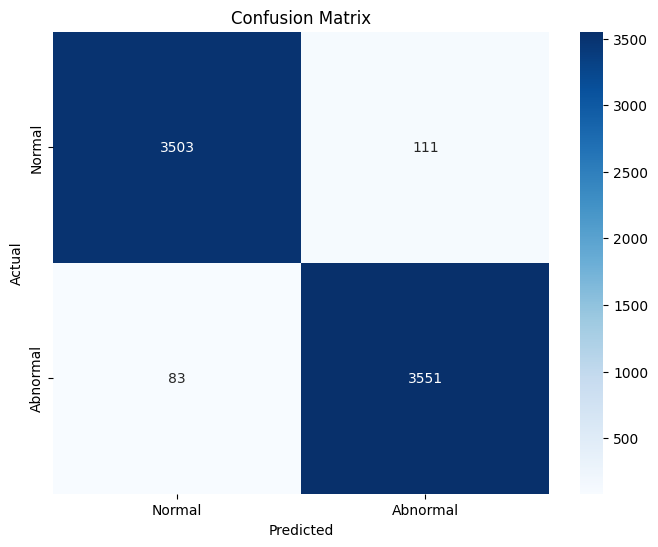

In [ ]:
!pip install seaborn
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()